In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('employee_promotion.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


# Exploratory Data Analysis

## Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


There are 54808 data with 13 columns in total. In the dataset, there are 2 columns with float64 datatype, 6 columns with int64 datatype, and 5 columns with object/string datatype

## Check Missing Data

In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

There are a lot of missing value in education, previous_year_rating, and avg_training_score columns. Soon we gonna clean those missing value with replacing them with median or mode data

## Descriptive Statistic

### Numeric Columns

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


### Categorical Columns

In [6]:
df.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Replacing Null Value with Median and Mode

- Median Data in previous_year_rating is 3
- Median Data in avg_training_score is 60
- Mode Data in education is Bachelor's

### Replacing Missing Value in Numerical Column

In [7]:
df = df.fillna(df.median())
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

### Replacing Missing Value in Categorical Column

In [8]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
df.to_csv('DataforViz.csv',index=False)

In [10]:
df2 = pd.read_csv('DataforViz.csv')

In [11]:
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


In [12]:
df2.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

## Check Outliers with Boxplot

In [13]:
data_col_float = df.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['previous_year_rating', 'avg_training_score']

In [14]:
data_col_numeric = df.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['employee_id',
 'no_of_trainings',
 'age',
 'length_of_service',
 'awards_won',
 'is_promoted']

In [15]:
data_col_category = df.select_dtypes(include=['object']).columns.tolist()
data_col_category

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [16]:
dfwithoutemployeeid = df[['no_of_trainings',
 'age',
 'length_of_service',
 'awards_won',
 'is_promoted','previous_year_rating', 'avg_training_score']]
dfwithoutemployeeid

,no_of_trainings,age,length_of_service,awards_won,is_promoted,previous_year_rating,avg_training_score
0,1,35,8,0,0,5.0,49.0
1,1,30,4,0,0,5.0,60.0
2,1,34,7,0,0,3.0,50.0
3,2,39,10,0,0,1.0,50.0
4,1,45,2,0,0,3.0,73.0
...,...,...,...,...,...,...,...
54803,1,48,17,0,0,3.0,78.0
54804,1,37,6,0,0,2.0,56.0
54805,1,27,3,0,0,5.0,79.0
54806,1,29,2,0,0,1.0,60.0


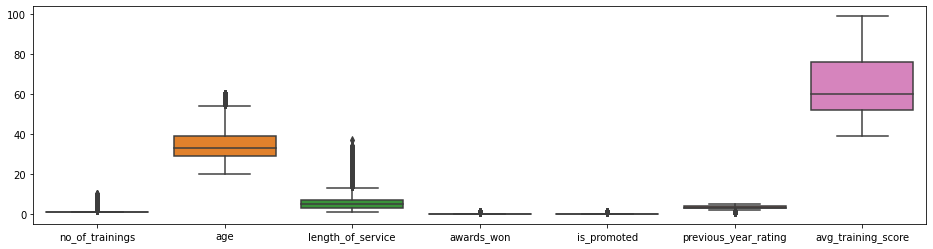

In [17]:
f = plt.figure(figsize=(16,4))
ax = sns.boxplot(data=dfwithoutemployeeid);

## Data Visualization

### Barplot Function

In [18]:
def barplot_analysis(data):
    barplot_data = df[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title(data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )
        
    plt.figure(figsize=(15,8))
    smallest5 = barplot_data.nsmallest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = smallest5,
        order = smallest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Least 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

### No_of_trainings

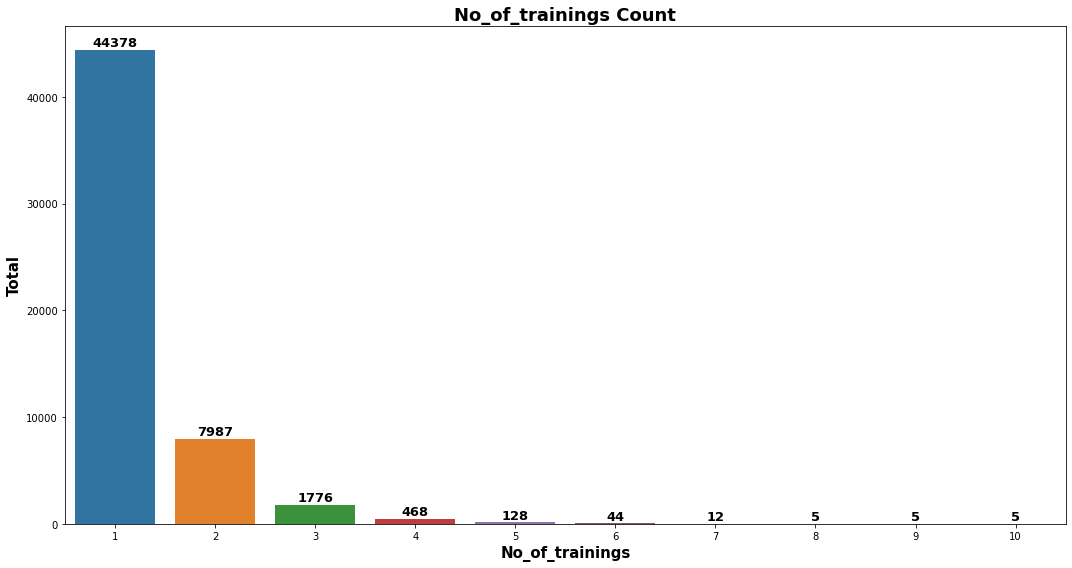

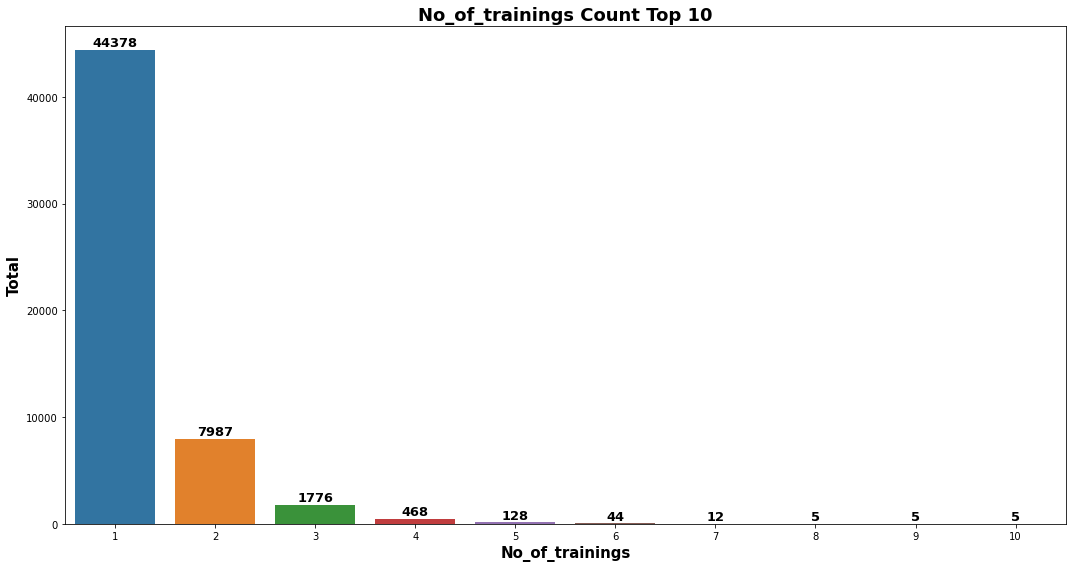

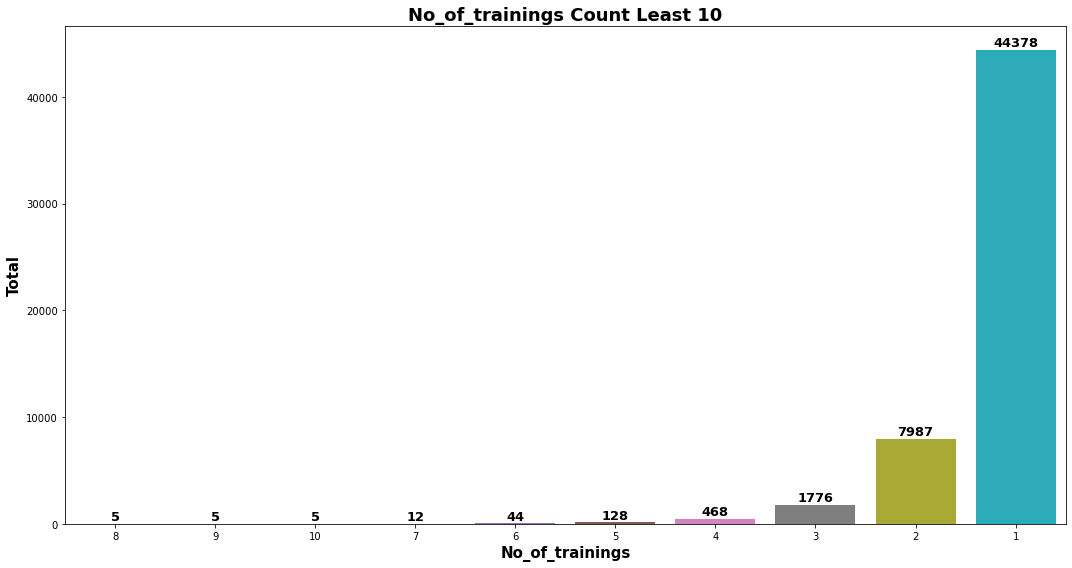

In [19]:
barplot_analysis(data_col_numeric[1])

### Age

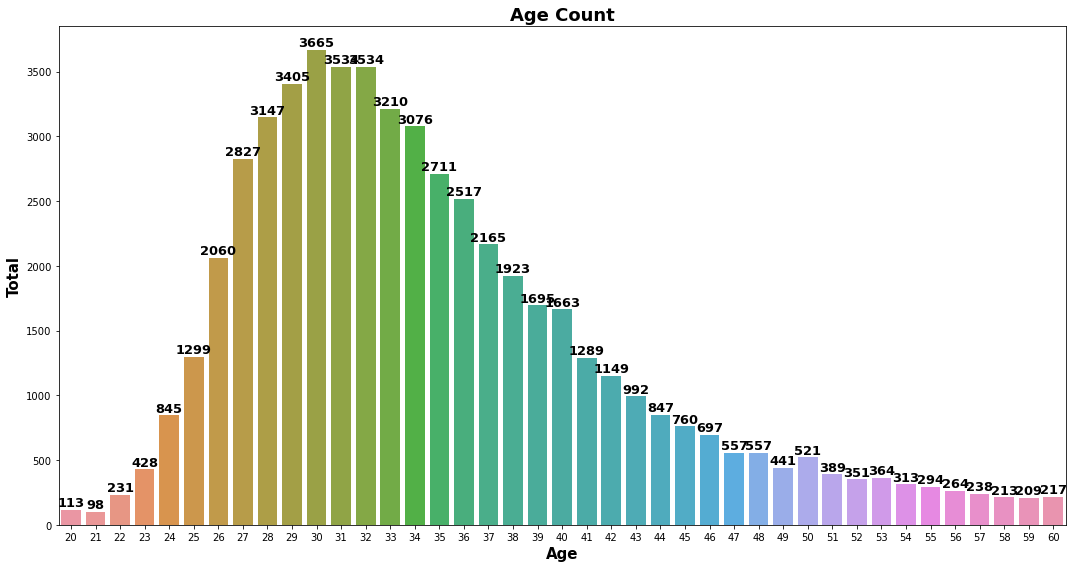

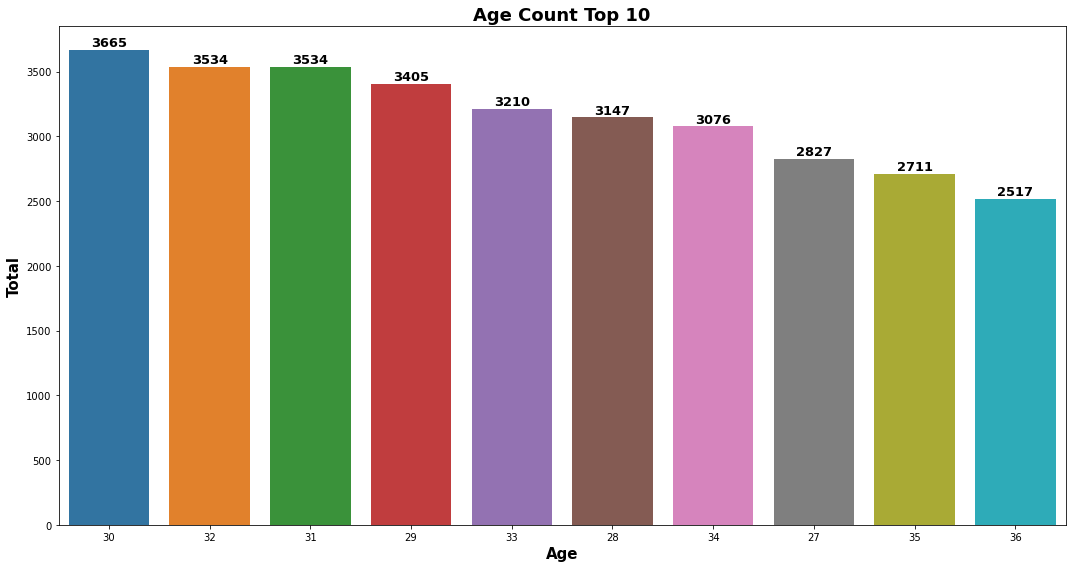

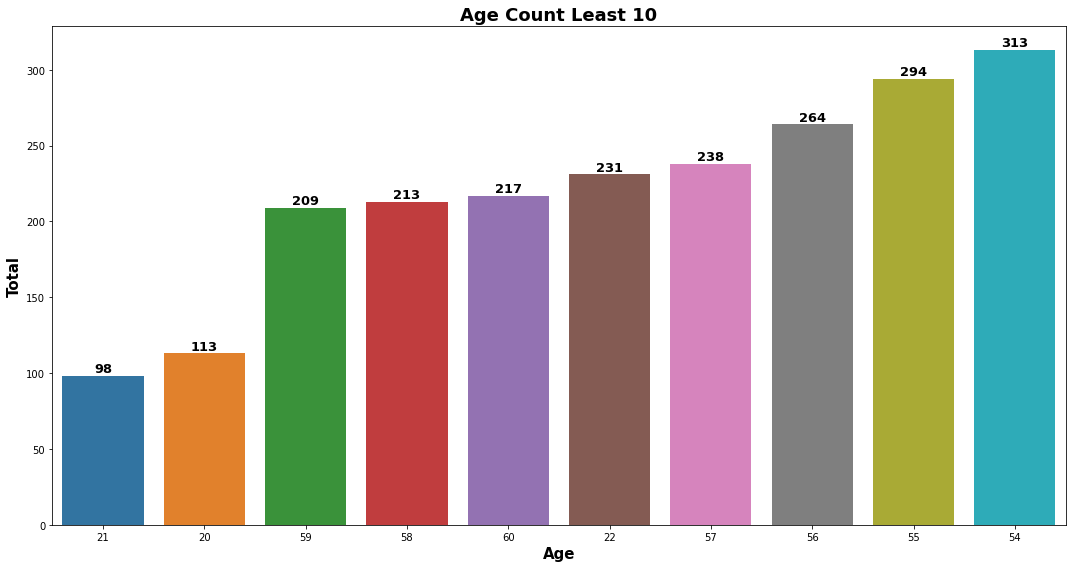

In [20]:
barplot_analysis(data_col_numeric[2])

### Length_of_service

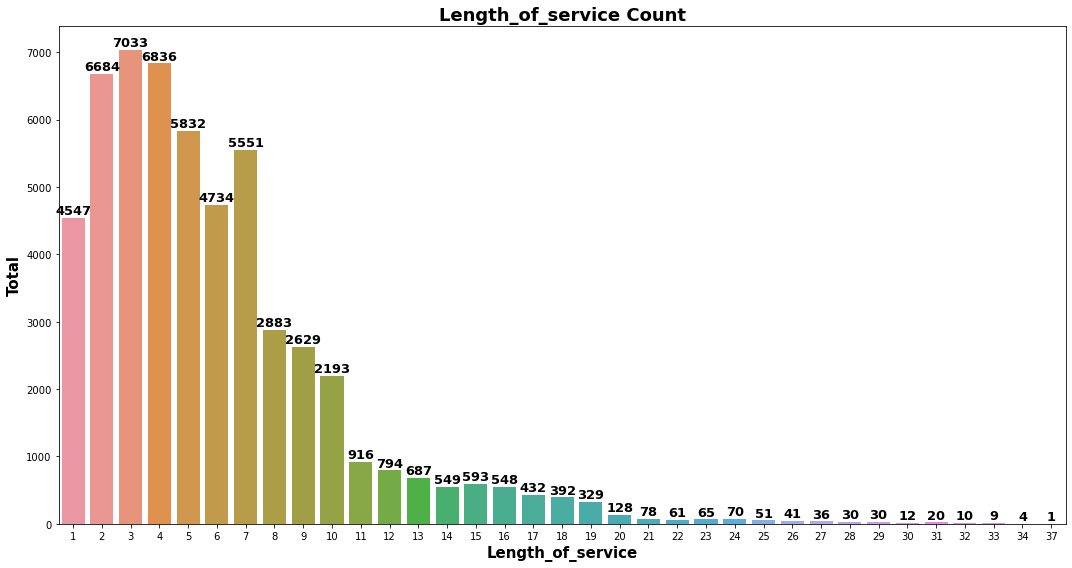

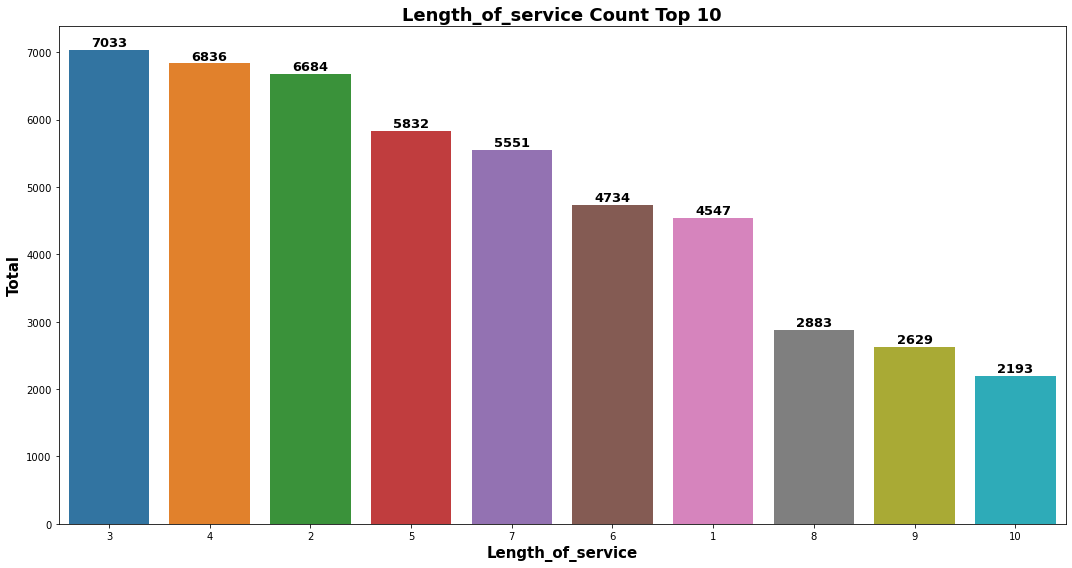

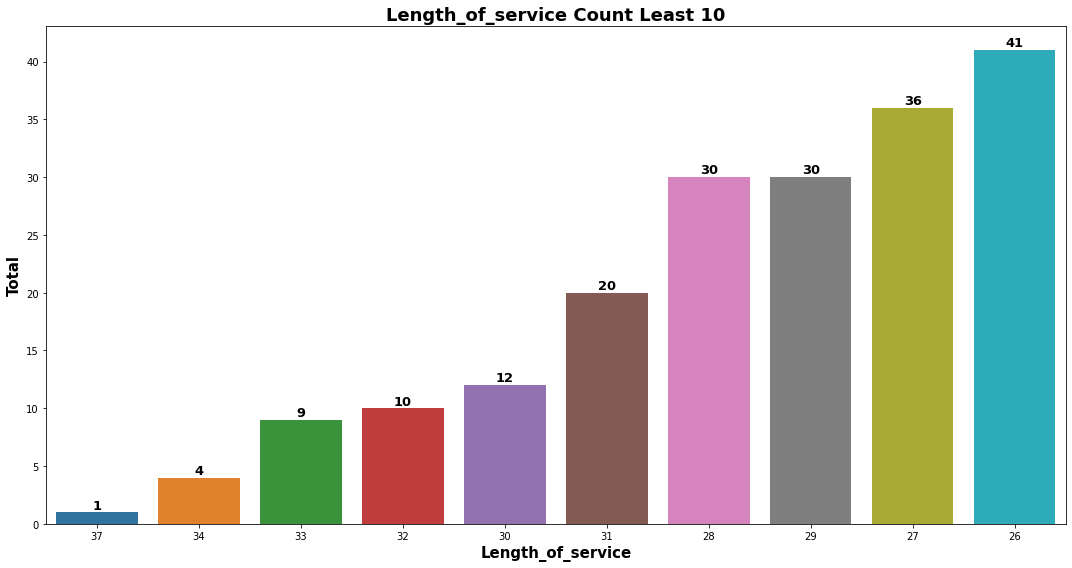

In [21]:
barplot_analysis(data_col_numeric[3])

### Awards_won

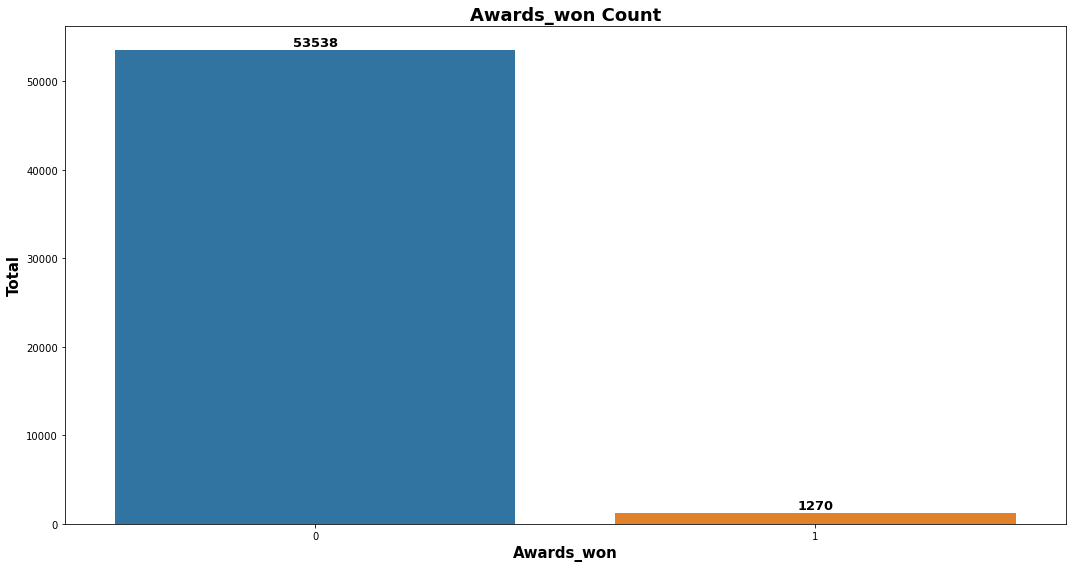

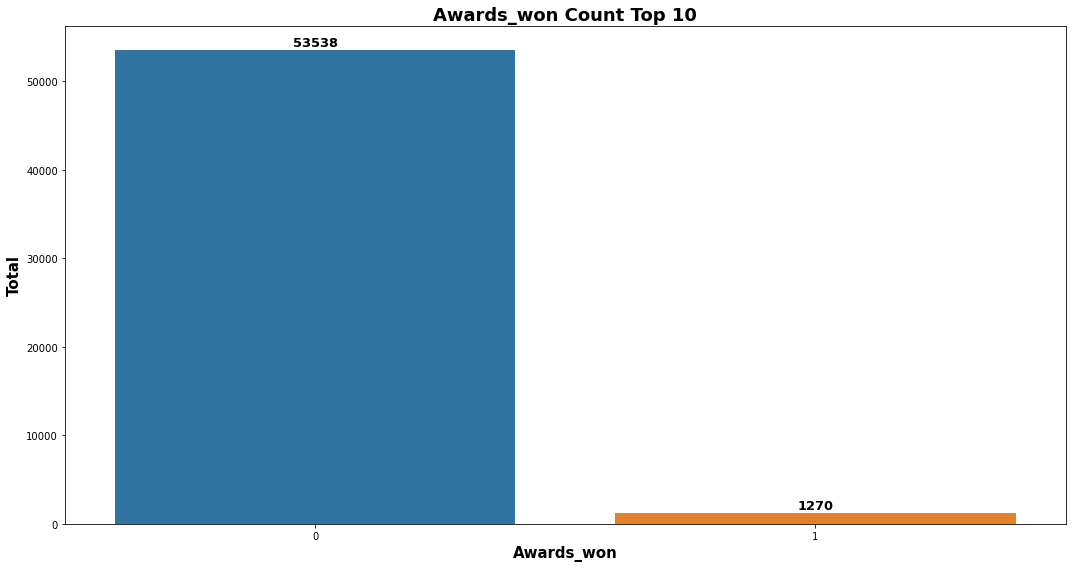

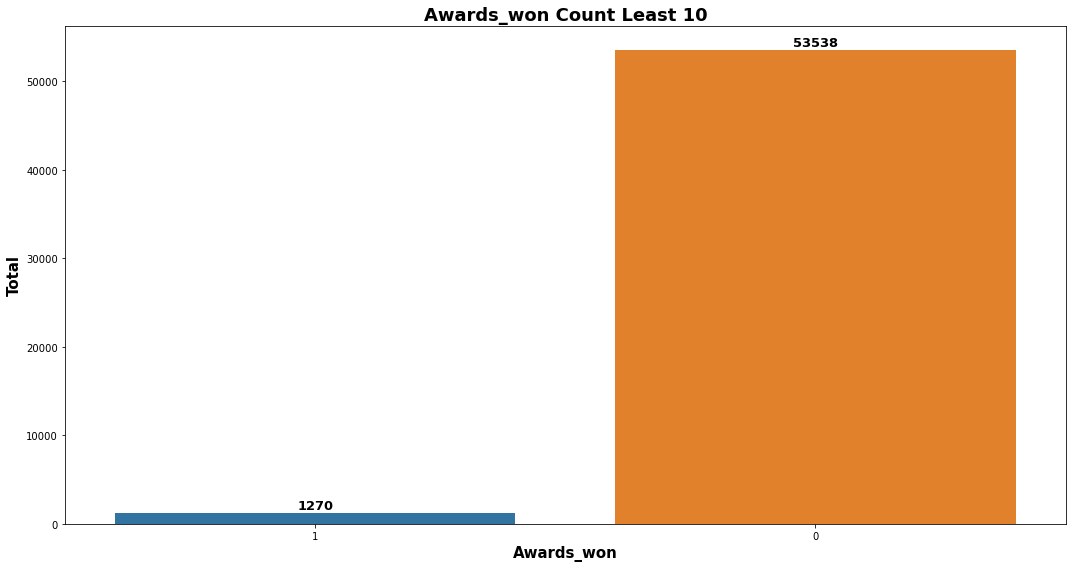

In [22]:
barplot_analysis(data_col_numeric[4])

### Is_promoted

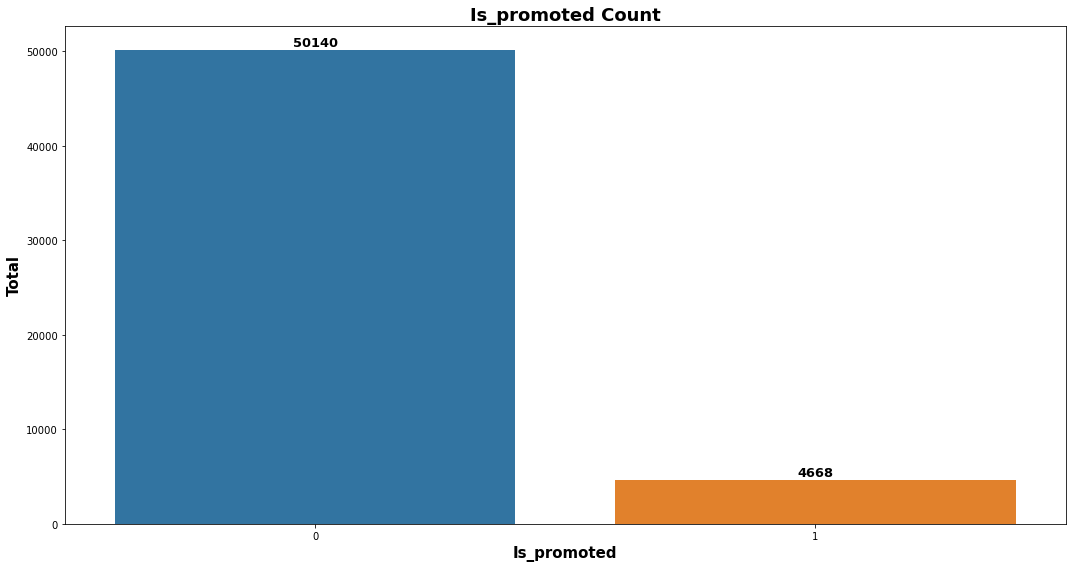

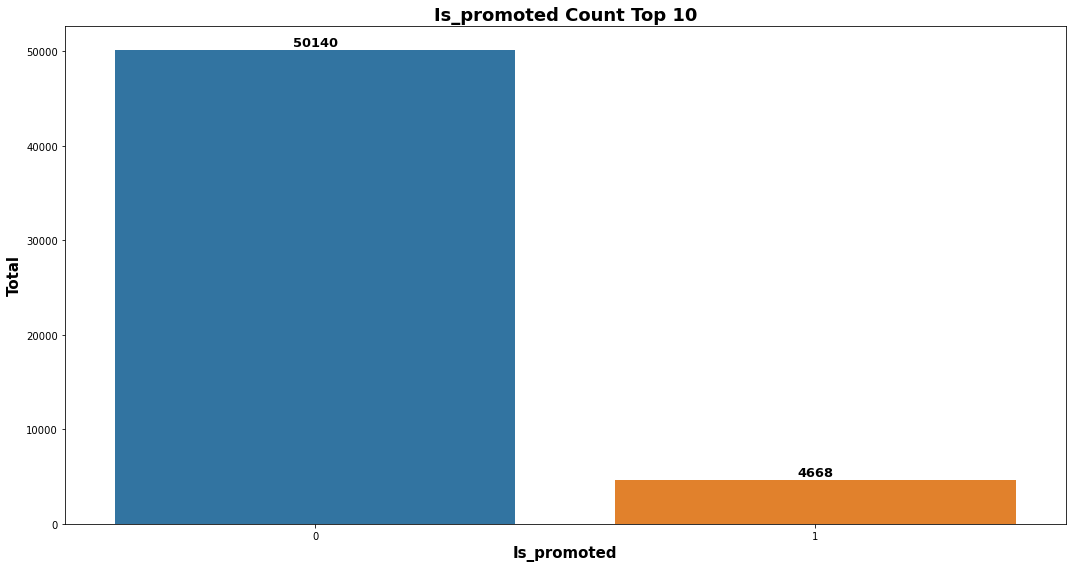

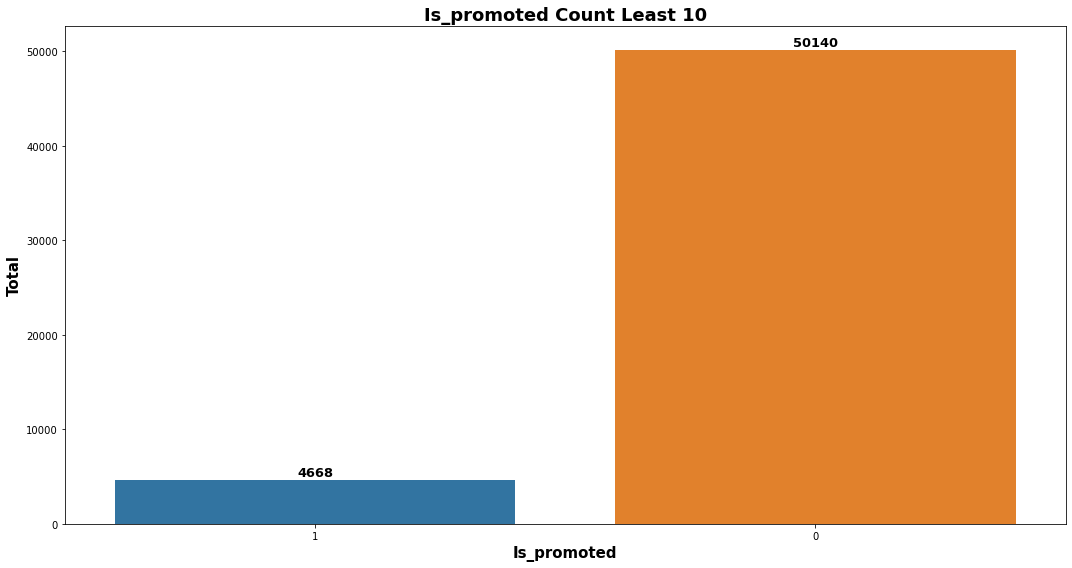

In [23]:
barplot_analysis(data_col_numeric[5])

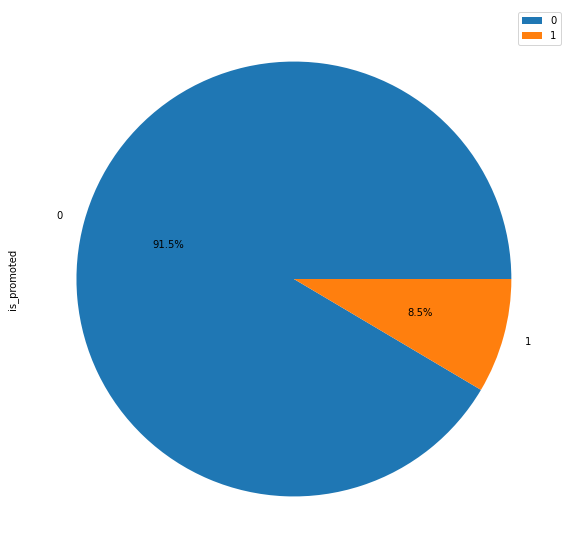

In [24]:
df["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### Previous_year_rating

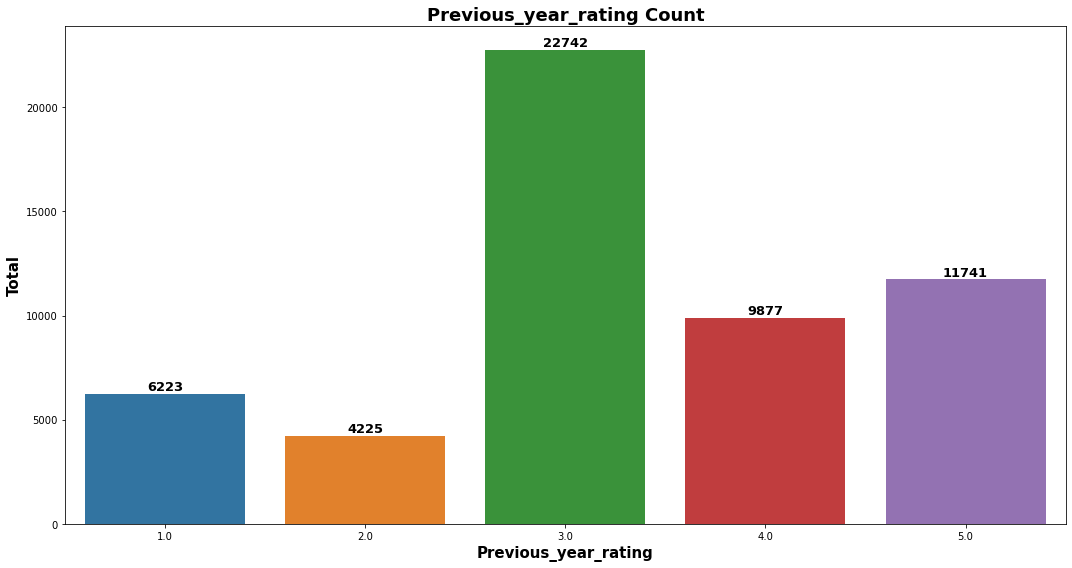

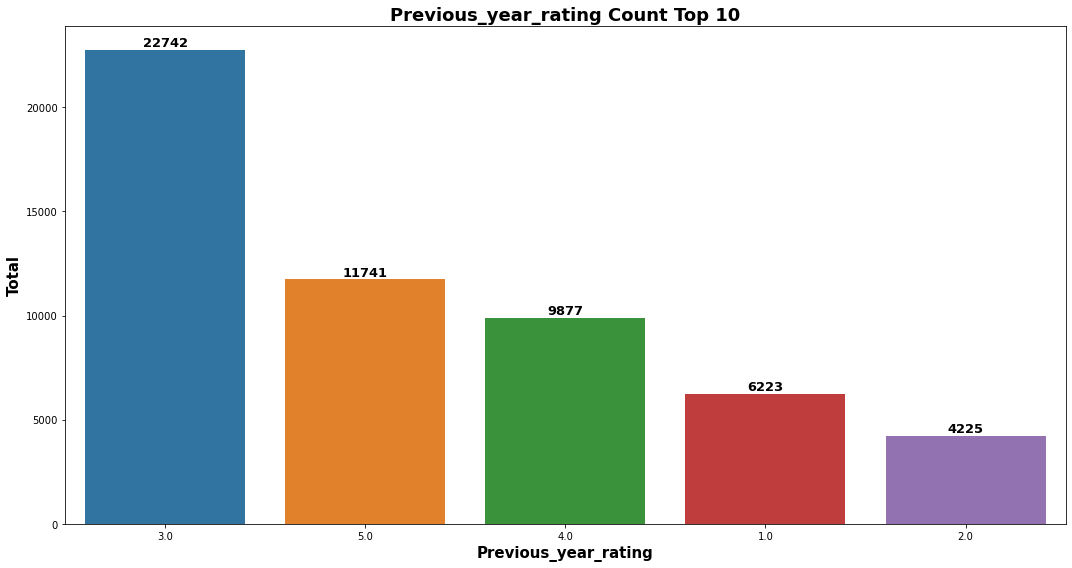

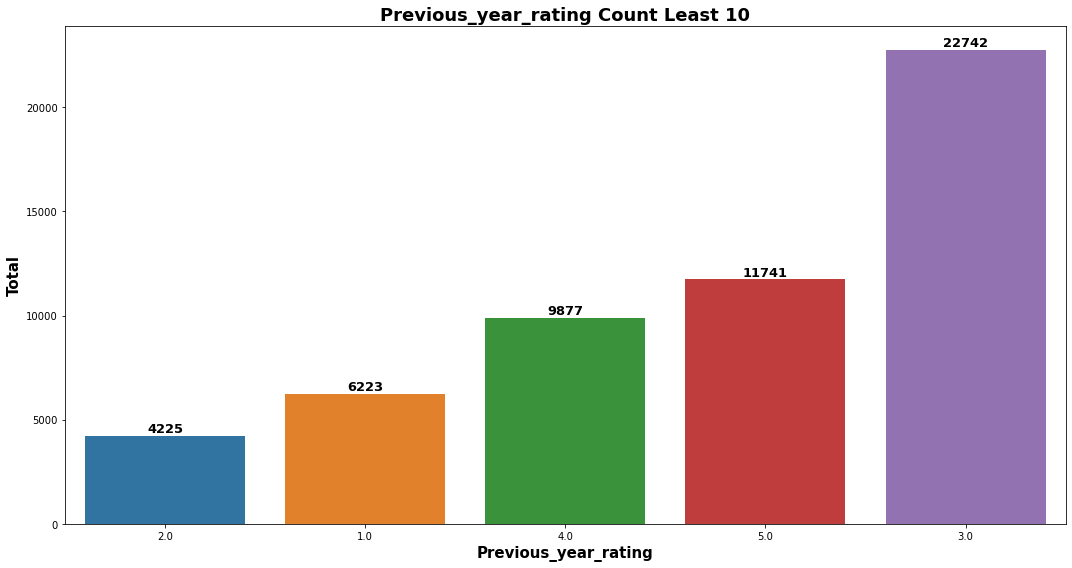

In [25]:
barplot_analysis(data_col_float[0])

### Avg_training_score

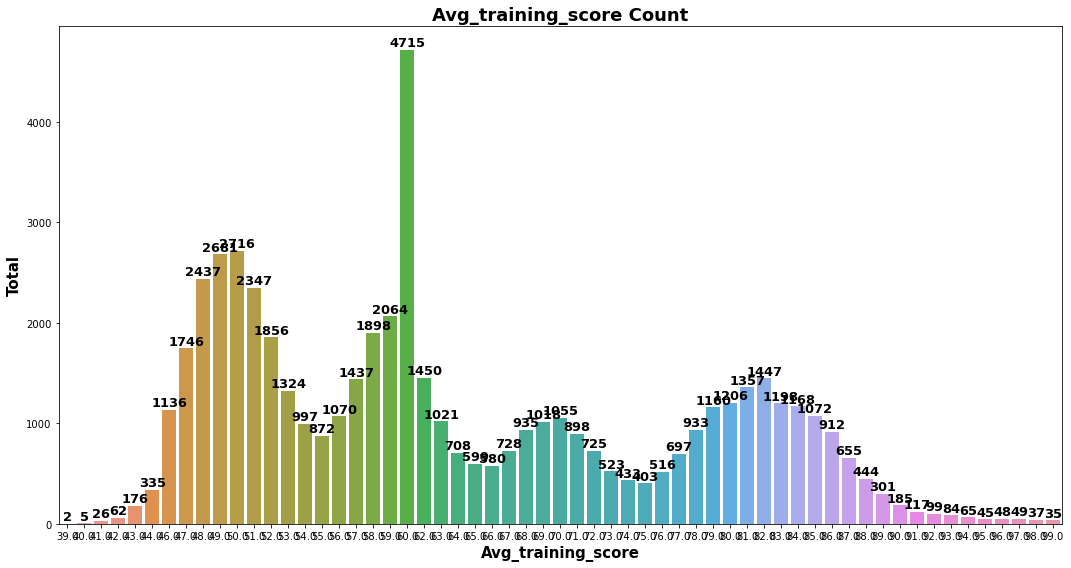

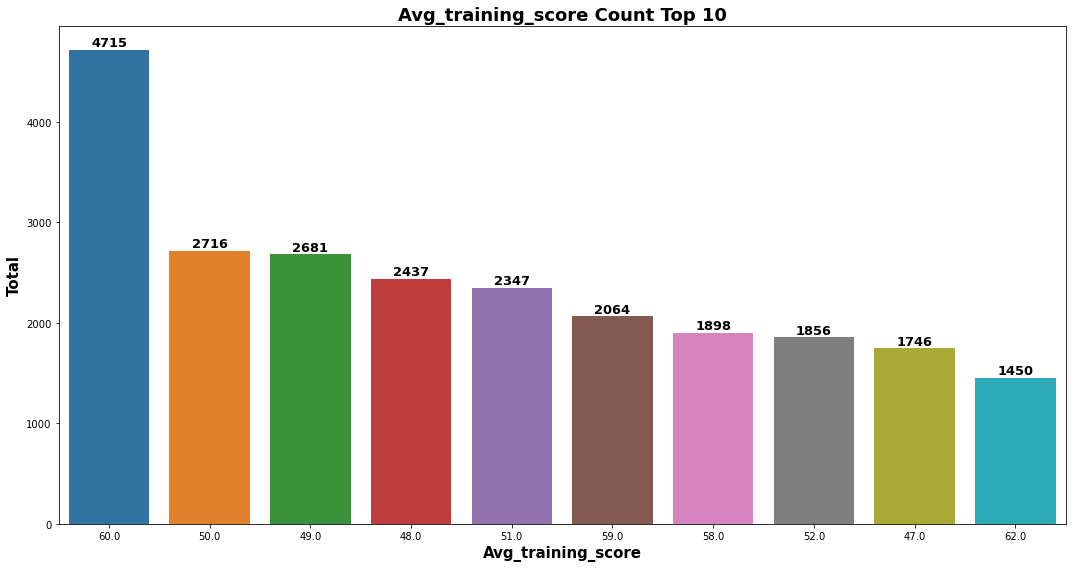

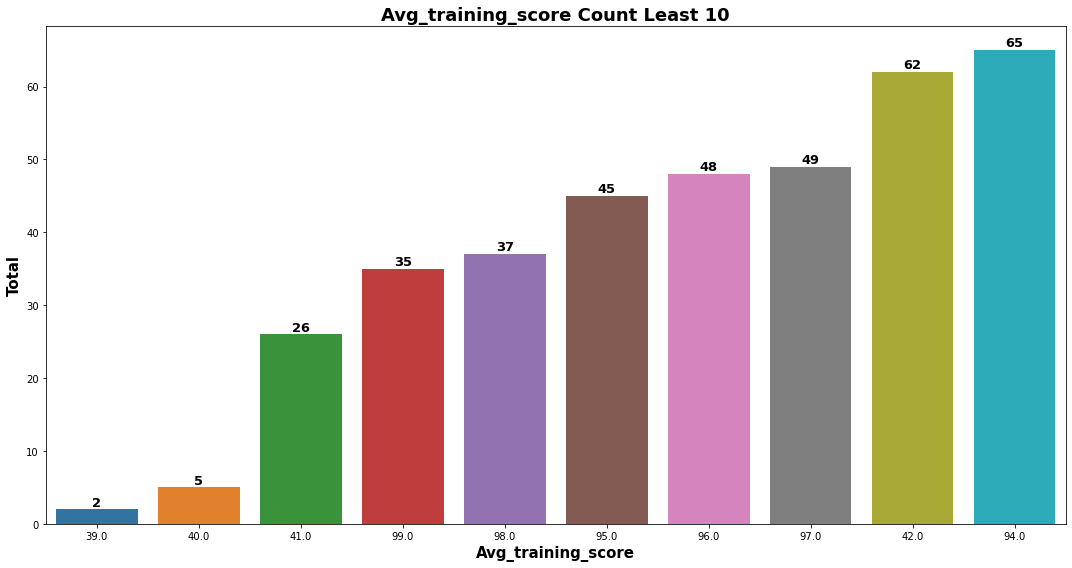

In [26]:
barplot_analysis(data_col_float[1])

### Department

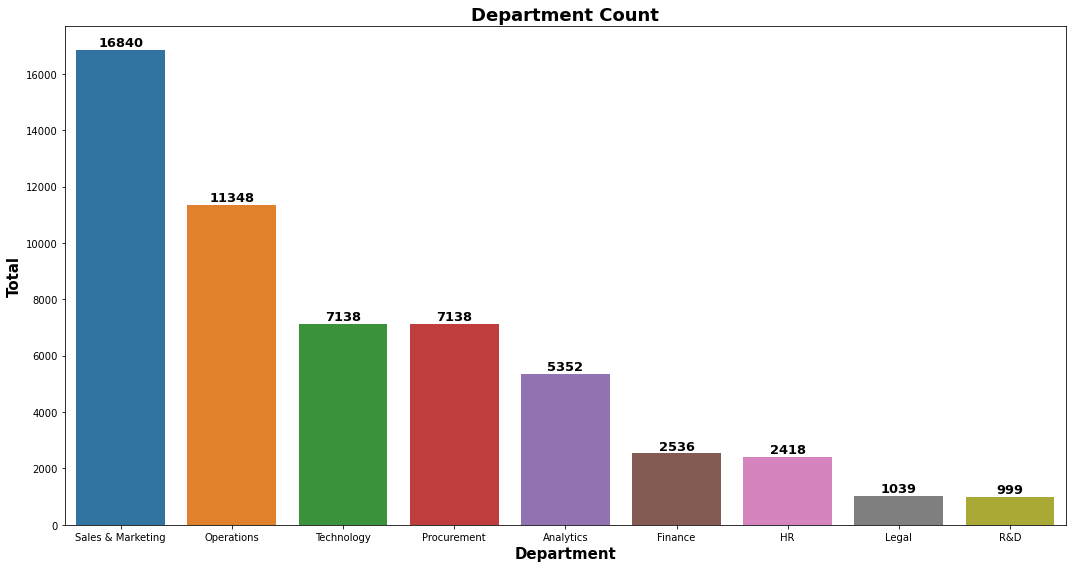

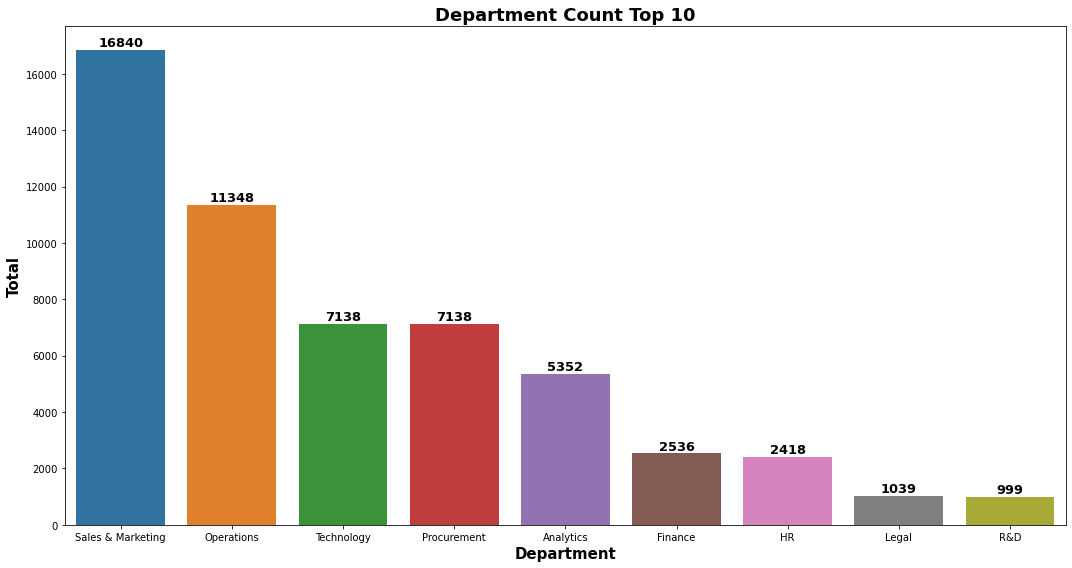

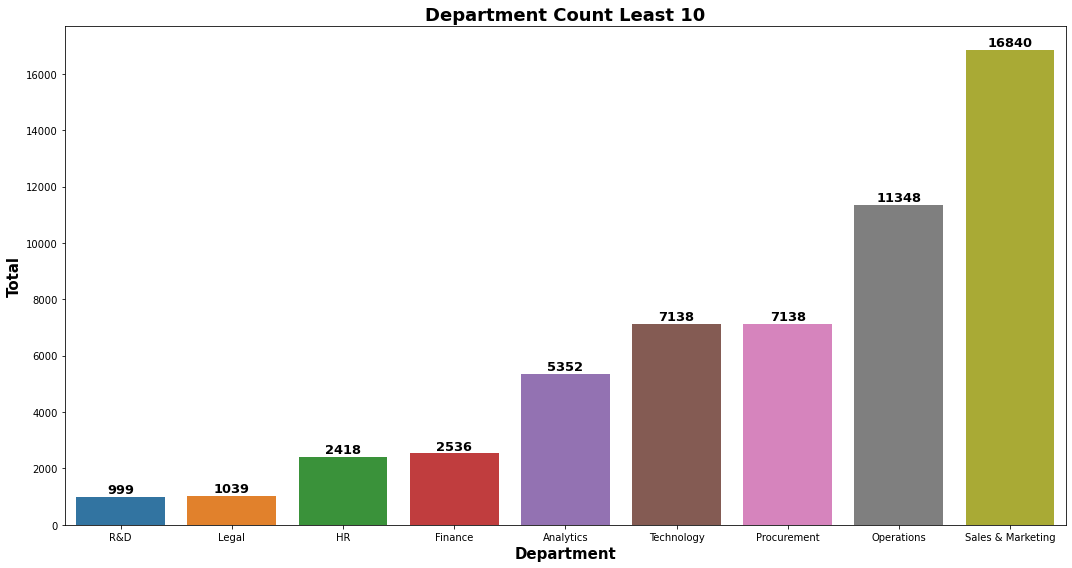

In [27]:
barplot_analysis(data_col_category[0])

### Region

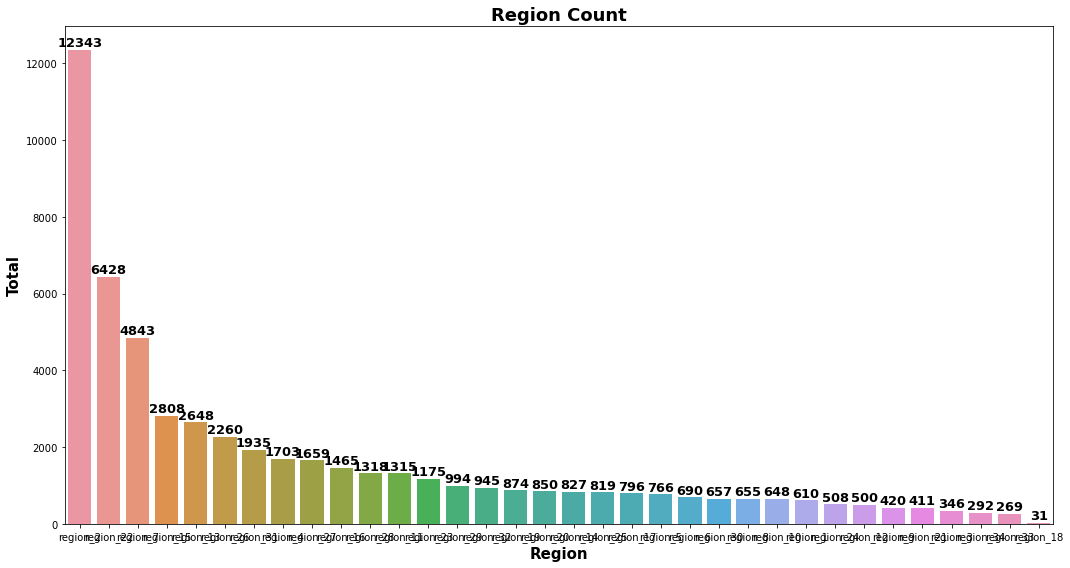

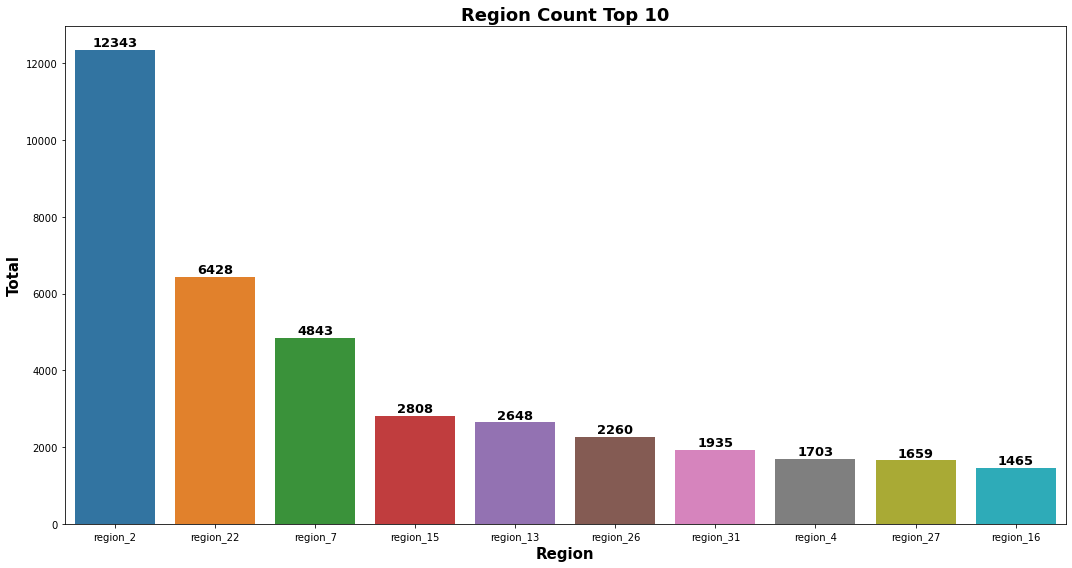

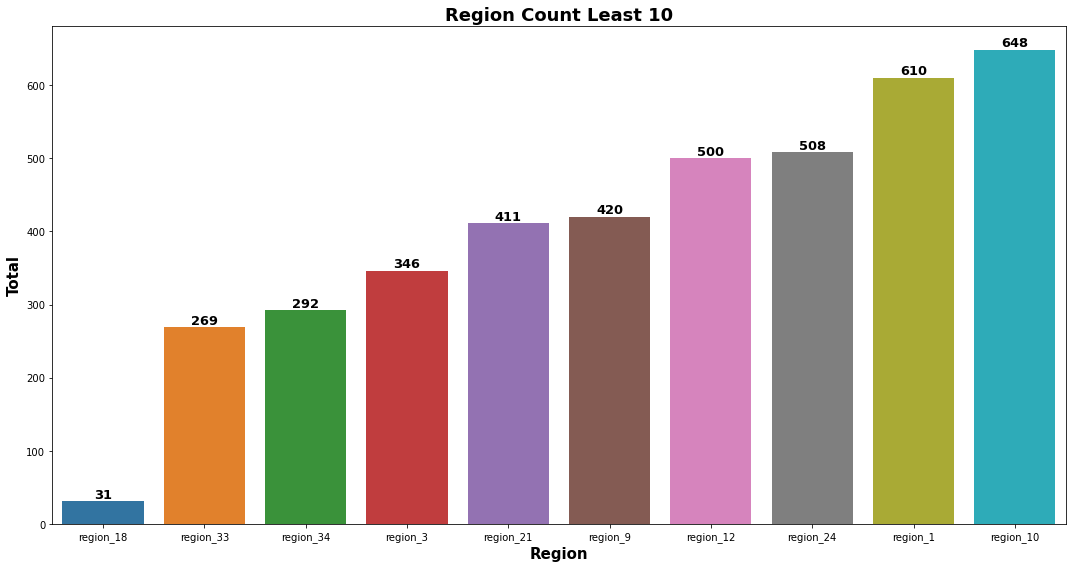

In [28]:
barplot_analysis(data_col_category[1])

### Education

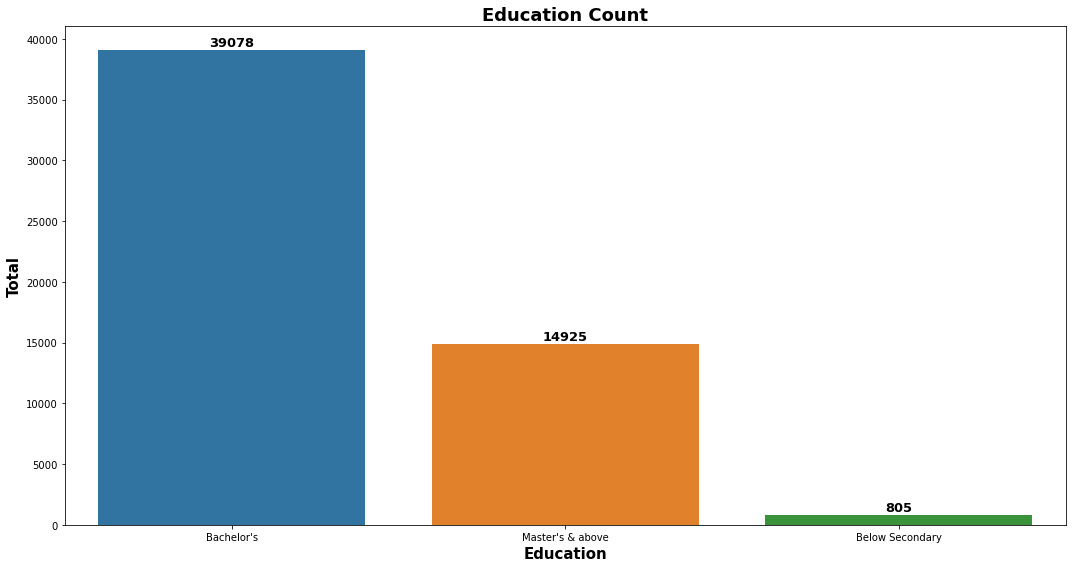

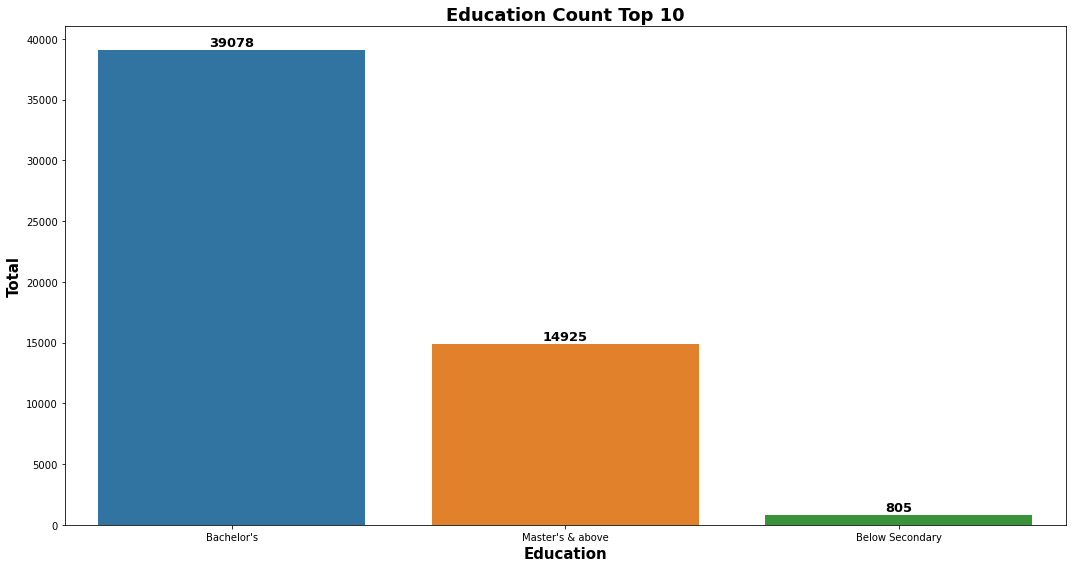

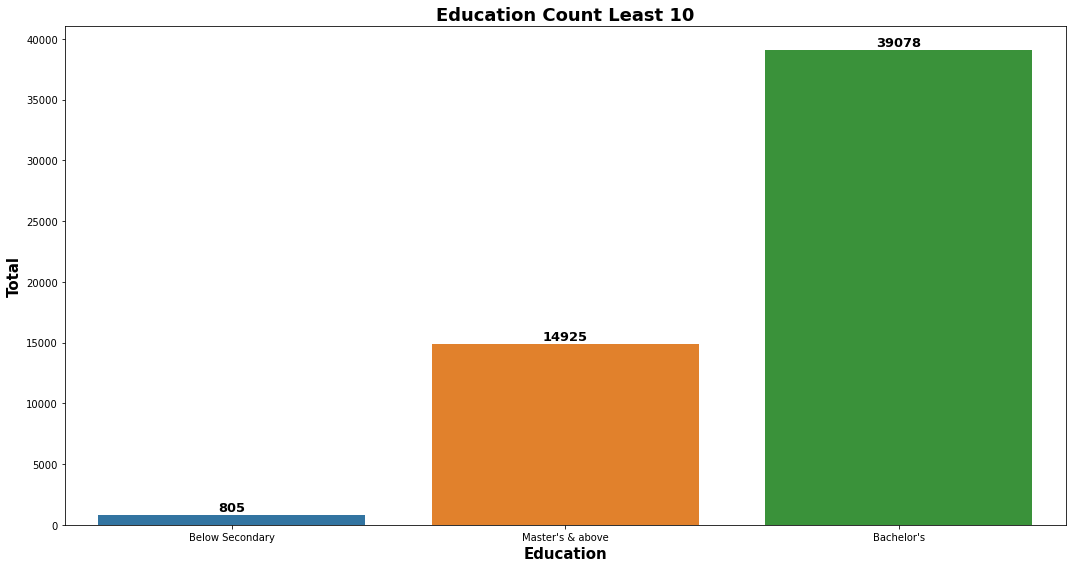

In [29]:
barplot_analysis(data_col_category[2])

### Gender

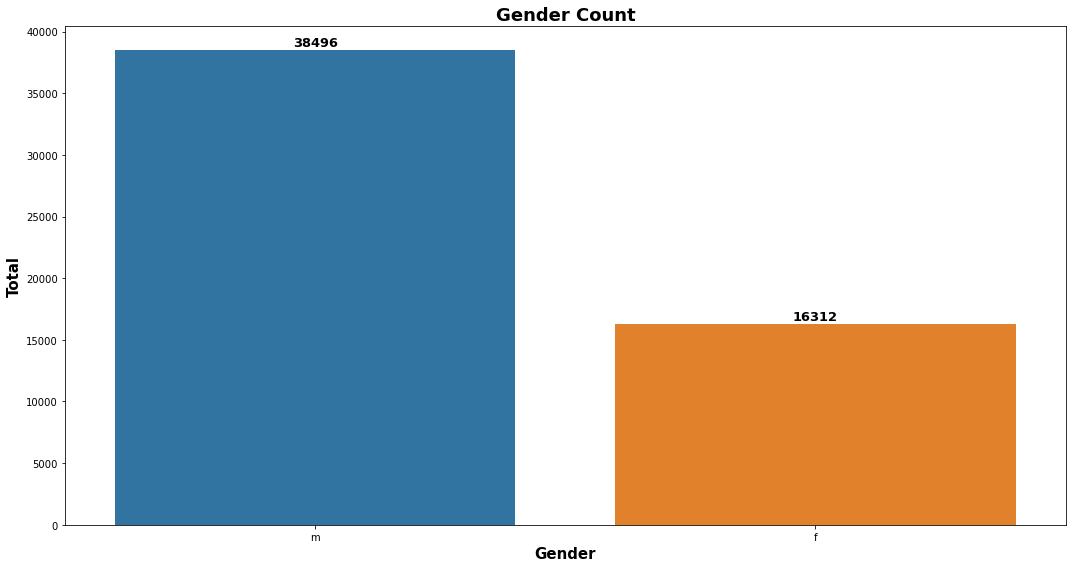

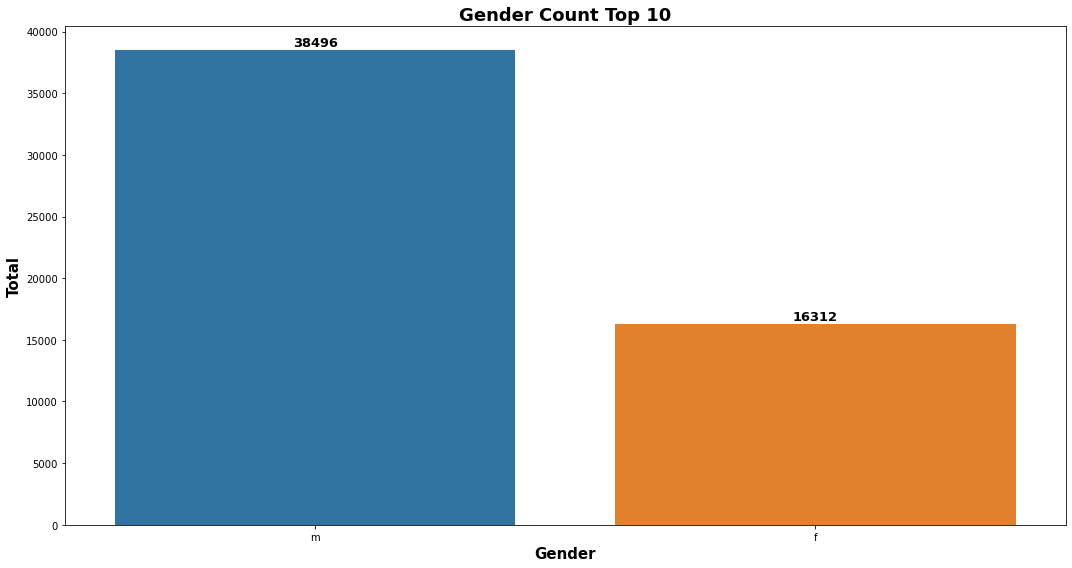

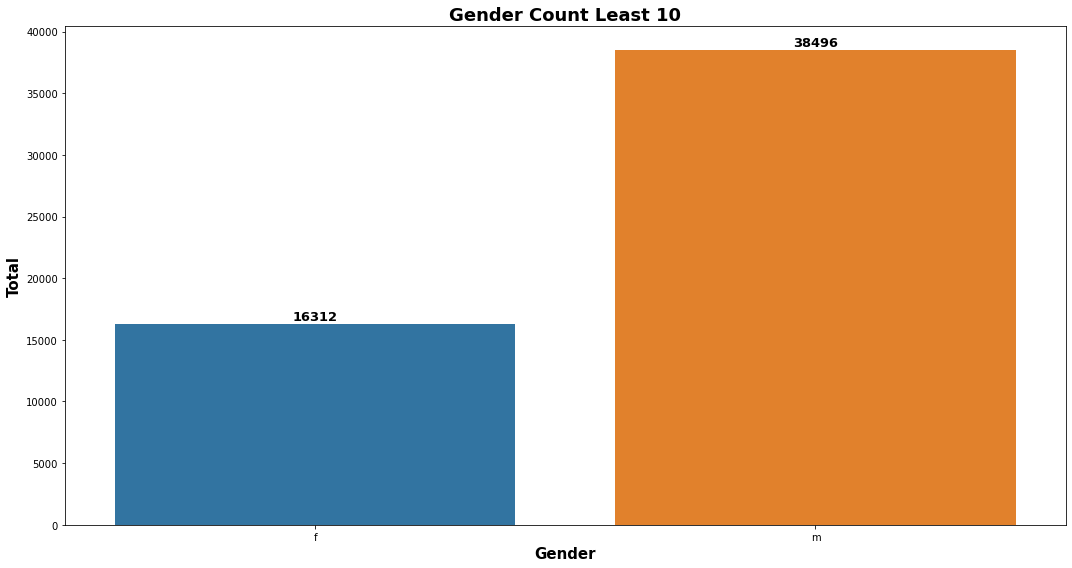

In [30]:
barplot_analysis(data_col_category[3])

### Recruitment_channel

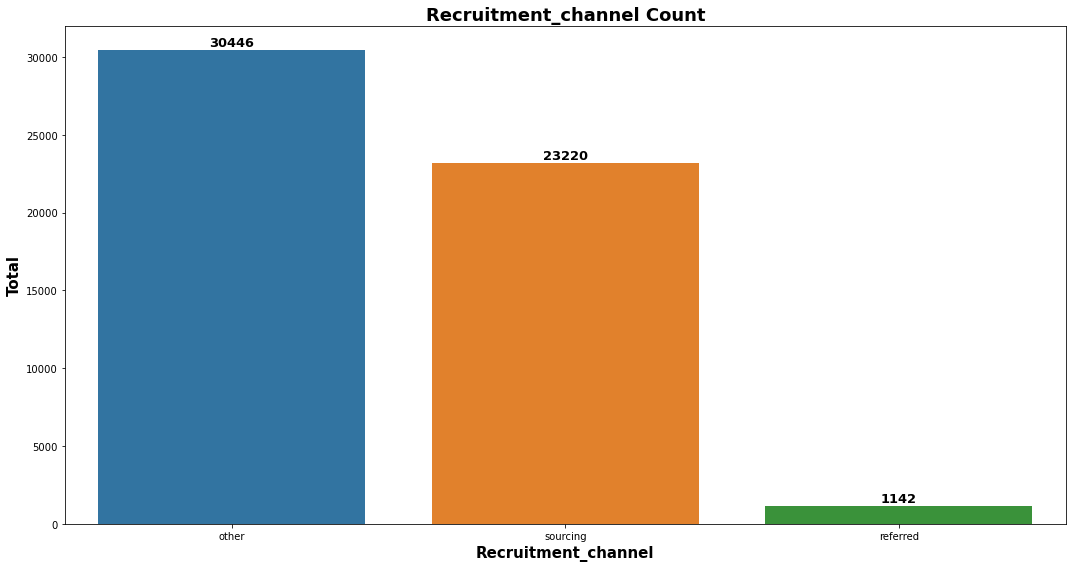

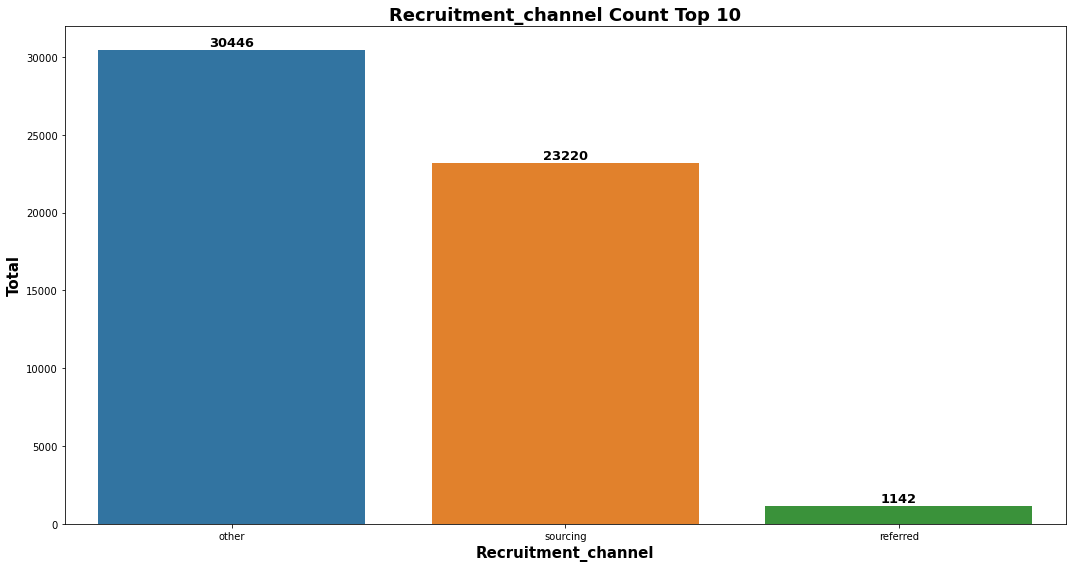

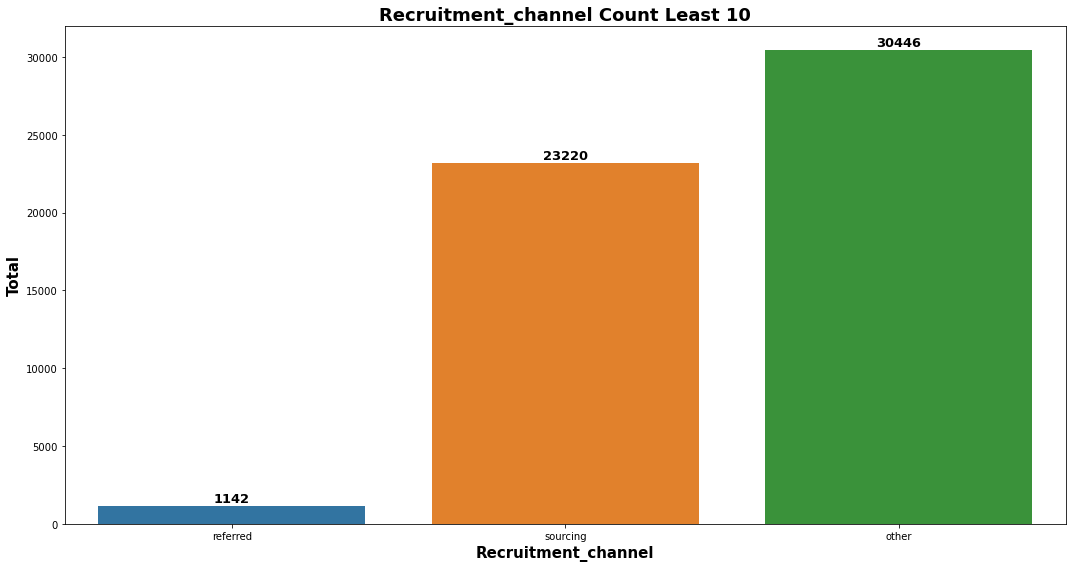

In [31]:
barplot_analysis(data_col_category[4])

## Further Analysis and Visualization

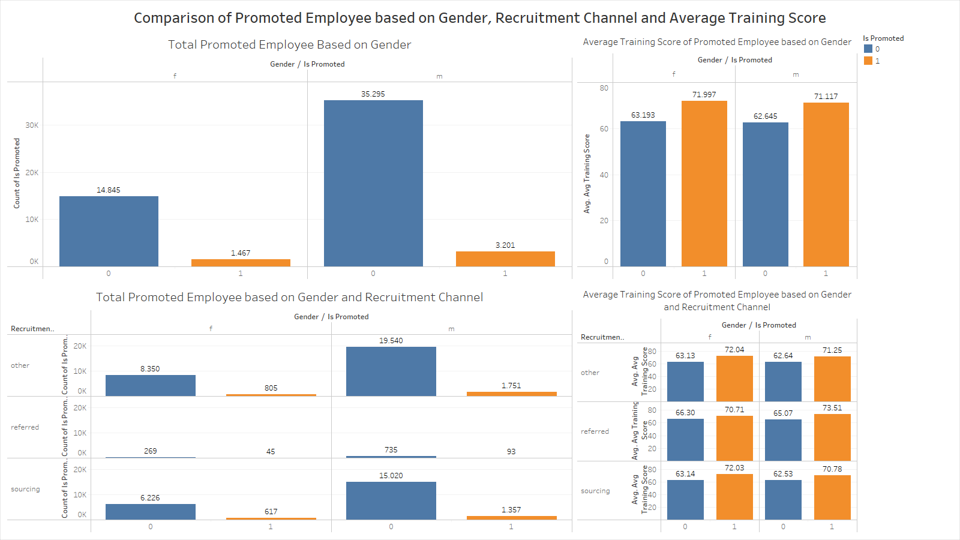

# Hypothesis Testing

There are several null hypothesis that can be inferred from dashboard in above :
- Null Hypothesis 1 : Average score of Female and Male is same
- Alternate Hypothesis 1 : Average score of Female and Male is not same



- Null Hypothesis 2 : Average score of Female and Male that got promoted is same
- Alternate Hypothesis 2 : Average score of Female and Male that got promoted is not same



- Null Hypothesis 3 : Average score of All Promoted Employee from Other Recruitment Channel and Sourcing Recruitment Channel is same
- Alternate Hypothesis 3 : Average score of All Promoted Employee from Other Recruitment Channel and Sourcing Recruitment Channel is not same

## Hypothesis Testing 1

- Null Hypothesis 1 : Average score of Female and Male is same
- Alternate Hypothesis 1 : Average score of Female and Male is not same

In [32]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


In [33]:
dfFemale = df[df['gender']=="f"]
dfFemale = dfFemale.reset_index(drop=True)
dfFemale

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0
2,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50.0,1
3,58789,Finance,region_11,Bachelor's,f,other,1,28,3.0,4,0,63.0,0
4,35465,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,24,1.0,2,0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,67988,HR,region_2,Bachelor's,f,sourcing,1,48,5.0,4,0,49.0,0
16308,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,0,51.0,0
16309,68093,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,67.0,0
16310,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,3.0,1,0,78.0,0


In [34]:
dfMale = df[df['gender']=='m']
dfMale = dfMale.reset_index(drop=True)
dfMale

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
1,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
2,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
3,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
38492,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
38493,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
38494,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


In [35]:
AVGTrainingScoreFemale = dfFemale['avg_training_score'].mean()
AVGTrainingScoreMale = dfMale['avg_training_score'].mean()
print("Average of Average Training Score Female is ", AVGTrainingScoreFemale)
print("Average of Average Training Score Male is ", AVGTrainingScoreMale)

Average of Average Training Score Female is  63.9852256007847
Average of Average Training Score Male is  63.34969866999169


From Average of Average Training Score in above, it indicates that Female has higher Average Training Score than Male Employee

In [36]:
dfFemale = dfFemale[['avg_training_score']]
dfFemale 

,avg_training_score
0,49.0
1,59.0
2,50.0
3,63.0
4,48.0
...,...
16307,49.0
16308,51.0
16309,67.0
16310,78.0


In [37]:
dfMale = dfMale[['avg_training_score']]
dfMale 

,avg_training_score
0,60.0
1,50.0
2,50.0
3,73.0
4,85.0
...,...
38491,49.0
38492,78.0
38493,79.0
38494,60.0


In [38]:
stats.ttest_ind(dfFemale, dfMale)

Ttest_indResult(statistic=array([5.14470471]), pvalue=array([2.68863219e-07]))

Based on result in above, pvalue is less than 0.05. So that, we can reject Null Hypothesis and Accept Alternate Hypothesis. It means that Average Training Score of Female and Male employee is not same. Also, based on T-value/Statistic Value in above, it indicate that Average Training Score of Female is higher than Male employee because we got positive T-Value,i.e. 5,14

## Hypothesis Testing 2

- Null Hypothesis 2 : Average score of Female and Male that got promoted is same
- Alternate Hypothesis 2 : Average score of Female and Male that got promoted is not same


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [40]:
dfFemalePromoted = df[(df['gender']=="f") & df['is_promoted']==1]
dfFemalePromoted = dfFemalePromoted.reset_index(drop=True)
dfFemalePromoted

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50.0,1
1,47498,Operations,region_11,Master's & above,f,sourcing,1,42,5.0,11,0,60.0,1
2,14141,Sales & Marketing,region_7,Bachelor's,f,other,1,40,3.0,2,0,90.0,1
3,38771,Procurement,region_23,Bachelor's,f,other,1,27,4.0,4,0,72.0,1
4,34985,Technology,region_5,Bachelor's,f,other,2,34,5.0,8,0,88.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,59303,Sales & Marketing,region_12,Bachelor's,f,other,1,27,3.0,1,0,67.0,1
1463,66684,Sales & Marketing,region_7,Master's & above,f,other,1,45,5.0,16,0,60.0,1
1464,12914,Operations,region_2,Bachelor's,f,other,1,40,3.0,11,0,91.0,1
1465,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,0,56.0,1


In [41]:
dfMalePromoted = df[(df['gender']=="m") & (df['is_promoted']==1)]
dfMalePromoted = dfMalePromoted.reset_index(drop=True)
dfMalePromoted

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51.0,1
1,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,0,47.0,1
2,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58.0,1
3,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,60.0,1
4,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,51059,Sales & Marketing,region_2,Bachelor's,m,other,1,29,5.0,4,0,58.0,1
3197,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,3.0,1,0,56.0,1
3198,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81.0,1
3199,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65.0,1


In [42]:
AVGTrainingScoreFemalePromoted = dfFemalePromoted['avg_training_score'].mean()
AVGTrainingScoreMalePromoted = dfMalePromoted['avg_training_score'].mean()
print("Average of Average Training Score Female Promoted is ", AVGTrainingScoreFemalePromoted)
print("Average of Average Training Score Male Promoted is ", AVGTrainingScoreMalePromoted)

Average of Average Training Score Female Promoted is  71.9972733469666
Average of Average Training Score Male Promoted is  71.11683848797252


From Average of Average Training Score in above, it indicates that Female Promoted has higher Average Training Score than Male Promoted Employee

In [43]:
dfFemalePromoted = dfFemalePromoted[['avg_training_score']]
dfFemalePromoted

,avg_training_score
0,50.0
1,60.0
2,90.0
3,72.0
4,88.0
...,...
1462,67.0
1463,60.0
1464,91.0
1465,56.0


In [44]:
dfMalePromoted = dfMalePromoted[['avg_training_score']]
dfMalePromoted

,avg_training_score
0,51.0
1,47.0
2,58.0
3,60.0
4,84.0
...,...
3196,58.0
3197,56.0
3198,81.0
3199,65.0


In [45]:
stats.ttest_ind(dfFemalePromoted, dfMalePromoted)

Ttest_indResult(statistic=array([1.90779219]), pvalue=array([0.0564794]))

Based on result in above, pvalue is less than equal to 0.05. So that, we can reject Null Hypothesis and Accept Alternate Hypothesis. It means that Average Training Score of Female Promoted and Male Promoted employee is not same. Also, based on T-value/Statistic Value in above, it indicate that Average Training Score of Female Promoted is higher than Male Promoted employee because we got positive T-Value,i.e. 1.90

## Hypothesis Testing 3

- Null Hypothesis 3 : Average score of All Promoted Employee from Other Recruitment Channel and Sourcing Recruitment Channel is same
- Alternate Hypothesis 3 : Average score of All Promoted Employee from Other Recruitment Channel and Sourcing Recruitment Channel is not same

In [46]:
dfPromotedEmployee_Other = df[(df['recruitment_channel']=="other") & (df['is_promoted']==1)]
dfPromotedEmployee_Other = dfPromotedEmployee_Other.reset_index(drop=True)
dfPromotedEmployee_Other

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,0,47.0,1
1,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58.0,1
2,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,0,84.0,1
3,24040,Technology,region_22,Master's & above,m,other,1,34,5.0,7,0,78.0,1
4,44575,Legal,region_7,Bachelor's,m,other,1,29,3.0,1,0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,0,56.0,1
2552,51059,Sales & Marketing,region_2,Bachelor's,m,other,1,29,5.0,4,0,58.0,1
2553,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81.0,1
2554,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65.0,1


In [47]:
dfPromotedEmployee_Sourcing = df[(df['recruitment_channel']=="sourcing") & (df['is_promoted']==1)]
dfPromotedEmployee_Sourcing = dfPromotedEmployee_Sourcing.reset_index(drop=True)
dfPromotedEmployee_Sourcing

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50.0,1
1,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51.0,1
2,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,60.0,1
3,54782,Sales & Marketing,region_2,Master's & above,m,sourcing,1,38,4.0,2,0,49.0,1
4,59147,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,30,3.0,3,0,58.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,56396,Procurement,region_22,Bachelor's,m,sourcing,1,30,4.0,4,0,67.0,1
1970,38719,Analytics,region_4,Bachelor's,m,sourcing,1,29,2.0,3,0,88.0,1
1971,47608,Procurement,region_10,Master's & above,m,sourcing,1,34,5.0,2,0,72.0,1
1972,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,3.0,1,0,56.0,1


In [48]:
AVGTrainingScorePromotedEmployee_Other = dfPromotedEmployee_Other['avg_training_score'].mean()
AVGTrainingScorePromotedEmployee_Sourcing = dfPromotedEmployee_Sourcing['avg_training_score'].mean()
print("Average of Average Training Score Promoted Employee from Other Recruitment Channel is ", AVGTrainingScorePromotedEmployee_Other)
print("Average of Average Training Score Promoted Employee from Sourcing Recruitment Channel is ", AVGTrainingScorePromotedEmployee_Sourcing)

Average of Average Training Score Promoted Employee from Other Recruitment Channel is  71.50117370892019
Average of Average Training Score Promoted Employee from Sourcing Recruitment Channel is  71.17021276595744


Based on Average of Average Training Score in above, Promoted Employee from Other Recruitment Channel is higher than Sourcing Recruitment Channel

In [49]:
AVGTrainingScorePromotedEmployee_Other = dfPromotedEmployee_Other[['avg_training_score']]
AVGTrainingScorePromotedEmployee_Other

,avg_training_score
0,47.0
1,58.0
2,84.0
3,78.0
4,65.0
...,...
2551,56.0
2552,58.0
2553,81.0
2554,65.0


In [50]:
AVGTrainingScorePromotedEmployee_Sourcing = dfPromotedEmployee_Sourcing[['avg_training_score']]
AVGTrainingScorePromotedEmployee_Sourcing

,avg_training_score
0,50.0
1,51.0
2,60.0
3,49.0
4,58.0
...,...
1969,67.0
1970,88.0
1971,72.0
1972,56.0


In [51]:
stats.ttest_ind(AVGTrainingScorePromotedEmployee_Other, AVGTrainingScorePromotedEmployee_Sourcing)

Ttest_indResult(statistic=array([0.753227]), pvalue=array([0.45135268]))

Based on result in above, Pvalue is 0.45, which is less than 0.05. It can be conclude that we accept the Null Hypothesis and Average Training Score of Promoted Employee from Other Recruitment Channel and Sourcing Channel is same 